# 1. Description of the Dataset

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely â€œFireâ€ and â€œnot Fireâ€



# 2. Loading all the required packages 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

# 3. Loading dataset

In [2]:
df=pd.read_csv('Algerian_forest_fires_dataset_UPDAT.csv', skiprows=1)

In [3]:
df.head(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [4]:
#checking info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 26.8+ KB


# 4. Data pre processing

In [5]:
#checking description of the dataset
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.759836,16.673361,7.049180
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.154628,14.201648,7.428366
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.450000,4.450000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


In [6]:
#4.1 checking null values
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [7]:
#Null Value imputation
df['month'].value_counts()
df['month']=df['month'].fillna(df['month'].mode()[0])
df['month'].isnull().sum() 

0

In [8]:
#imputing null value for year field
df['year'].value_counts()
df['year']=df['year'].fillna(df['year'].mode()[0])
df['year'].isnull().sum() 

0

In [9]:
#Null value imputation of tempreture
df['Temperature'].value_counts()

35    29
31    25
34    24
33    23
30    22
32    21
36    21
29    18
28    15
37     9
27     8
25     6
39     6
26     5
24     3
38     3
40     3
22     2
42     1
Name: Temperature, dtype: int64

In [10]:
#from here we can checking if there is any null value or not
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 26.8+ KB


In [12]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [13]:
#found some spaces in columns so trying to remove all the spaces here by rename
df.rename(columns={' RH':'RH',' Ws':'Ws','Rain ':'Rain','Classes  ':'Classes'},inplace=True)

In [14]:
#now checking rename worked or not 
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [15]:
#checking unique values of BUI
df['BUI'].unique()

array([ 3.4,  3.9,  2.7,  1.7,  7. , 10.9, 13.5, 10.5, 12.6, 15.8, 17.7,
        6.7,  4.4,  3. ,  2.2,  1.6,  2.4,  5.3,  5.1,  8.4,  9.7, 11.5,
       14.9, 18.3, 21.6, 25.8, 29.7, 23.8, 28.3,  2.9,  2.8,  5.7,  9.1,
       12.5, 12.1, 15.4,  7.4,  5.8,  8.1,  9.2, 11.7,  5.9,  8.3, 11.1,
       14.2, 18.2, 16.5, 22.4, 21.7, 14.7, 18.5, 23.9, 29.4, 32.1, 35. ,
       37.4, 41.2,  4.7,  5.5,  8.2, 17.2, 14.1, 17.9, 21.9, 25.5, 20.7,
       24.4, 27.2, 22. , 17.6, 22.9, 27.5, 31.3, 34.7, 38.8, 43.1, 47.5,
       50.9, 54.7, 57.1, 59.3, 62.9, 67.4,  1.8,  1.1,  5.6,  2.6,  3.7,
        1.4,  4.2,  7.7, 11.3, 16. , 19.2, 12.9,  9.6,  6.2,  9. ,  6.8,
        6.5,  9.3, 10.7,  7.3, 13.1, 18. , 21.2,  6.1,  7.1,  4.1,  3.8,
        9.9, 12.7, 16.4, 20.8, 27.1, 17.8,  3.3,  7.8, 10.3, 18.7, 16.7,
       13.7,  9.4, 20.9, 27.7, 32.6, 39.5, 44. , 46.5, 11.4, 11.8, 15.7,
       19.5, 10.6, 16.9, 23.5,  6.9, 11. , 18.4, 17.5, 22.3, 19. , 24.2,
       30.4, 35.9, 35.5, 38.1, 41.3, 45.5, 50.2, 54

In [16]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [17]:
#converting data type of columns
df['Temperature']=df['Temperature'].astype('float64')
df['day']=df['day'].astype('int64')
df['month']=df['month'].astype('int64')
df['year']=df['year'].astype('int64')
df['RH']=df['RH'].astype('float64')
df['Ws']=df['Ws'].astype('float64')
df['Rain']=df['Rain'].astype('float64')
df['FFMC']=df['FFMC'].astype('float64')
df['DMC']=df['DMC'].astype('float64')
df['DC']=df['DC'].astype('float64')
df['ISI']=df['ISI'].astype('float64')
df['BUI']=df['BUI'].astype('float64')
df['FWI']=df['FWI'].astype('float64')

In [18]:
df.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
day,1.000000e+00,2.232788e-17,NaN,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527929,0.179301,0.517224,0.350234
month,2.232788e-17,1.000000e+00,NaN,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127672,0.063545,0.085567,0.081732
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,9.577222e-02,-5.901677e-02,NaN,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.605971,0.456415,0.566839
RH,-7.420934e-02,-3.788419e-02,NaN,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.688268,-0.349685,-0.580457
Ws,4.700086e-02,-4.144673e-02,NaN,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.012245,0.030303,0.033957
Rain,-1.122654e-01,3.532207e-02,NaN,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347862,-0.299409,-0.324755
FFMC,2.240321e-01,1.557668e-02,NaN,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.740751,0.590251,0.691430
DMC,4.915710e-01,6.817778e-02,NaN,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.678355,0.982206,0.875191
DC,5.279285e-01,1.276719e-01,NaN,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.503919,0.941672,0.737041


In [19]:
df.info(linewidth = 1)

TypeError: info() got an unexpected keyword argument 'linewidth'

In [ ]:
#checking unique value of classes and getting too many unique values as not fire and fire
df['Classes'].unique()

# 4. EDA

In [20]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [21]:
#Bivariate analysis

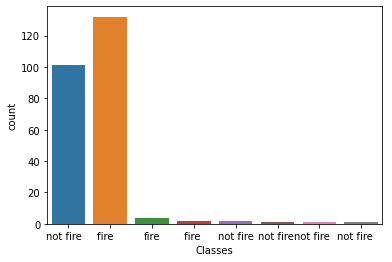

In [22]:
#doing encoding to convert categorical value into numerical value
sns.countplot(df['Classes'])
df['Classes']=df['Classes'].map({'not fire   ':0, 'fire   ':1, 'fire':1, 'fire ':1, 'not fire':0, 'not fire ':0,
       'not fire     ':0, 'not fire    ':0})


<AxesSubplot:xlabel='Classes', ylabel='count'>

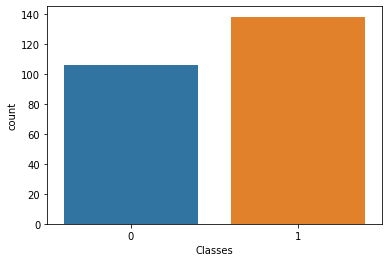

In [23]:
#By the use of count plot here it can easily see that fire happen more than non fire
sns.countplot(df['Classes'])

<AxesSubplot:xlabel='month', ylabel='Temperature'>

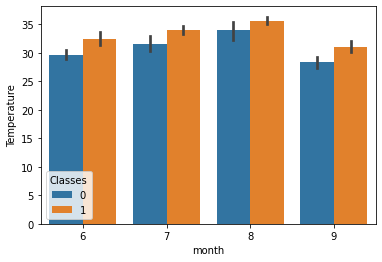

In [24]:
#Month wise file or not fire from here i hot 8th monthis having maximum fire
sns.barplot('month','Temperature',hue='Classes',data=df)

<AxesSubplot:xlabel='Ws', ylabel='Classes'>

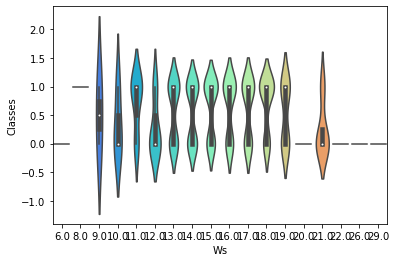

In [25]:
sns.violinplot(x="Ws", y="Classes", data=df,palette='rainbow')

<AxesSubplot:xlabel='Temperature', ylabel='Classes'>

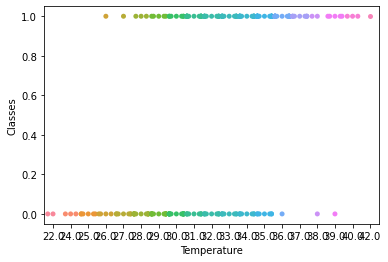

In [26]:
sns.swarmplot(x="Temperature", y="Classes", data=df)

<AxesSubplot:xlabel='year', ylabel='Classes'>

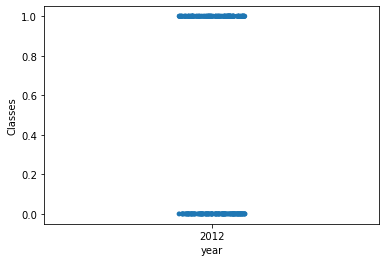

In [27]:
sns.stripplot(x="year", y="Classes", data=df)

<AxesSubplot:xlabel='Temperature', ylabel='Classes'>

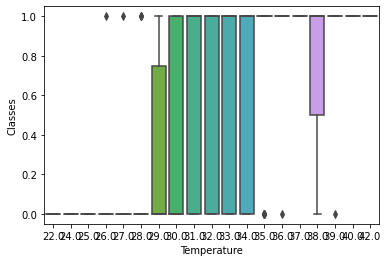

In [28]:
sns.boxplot(x='Temperature',y='Classes',data=df)

# Distribution plot

<AxesSubplot:xlabel='Classes', ylabel='Density'>

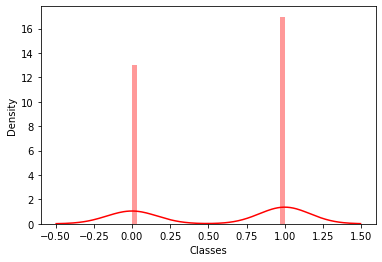

In [29]:
#seeing the data distribution within classes
sns.distplot(df['Classes'], kde = True, color ='red', bins = 30)

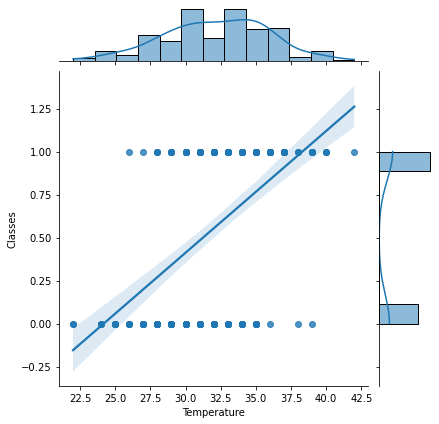

In [30]:
#I checked with all the independent variable but i found some linear relationship between tempreture and classes only
sns.jointplot(x = "Temperature", y = "Classes",kind = "reg", data = df, dropna = True)

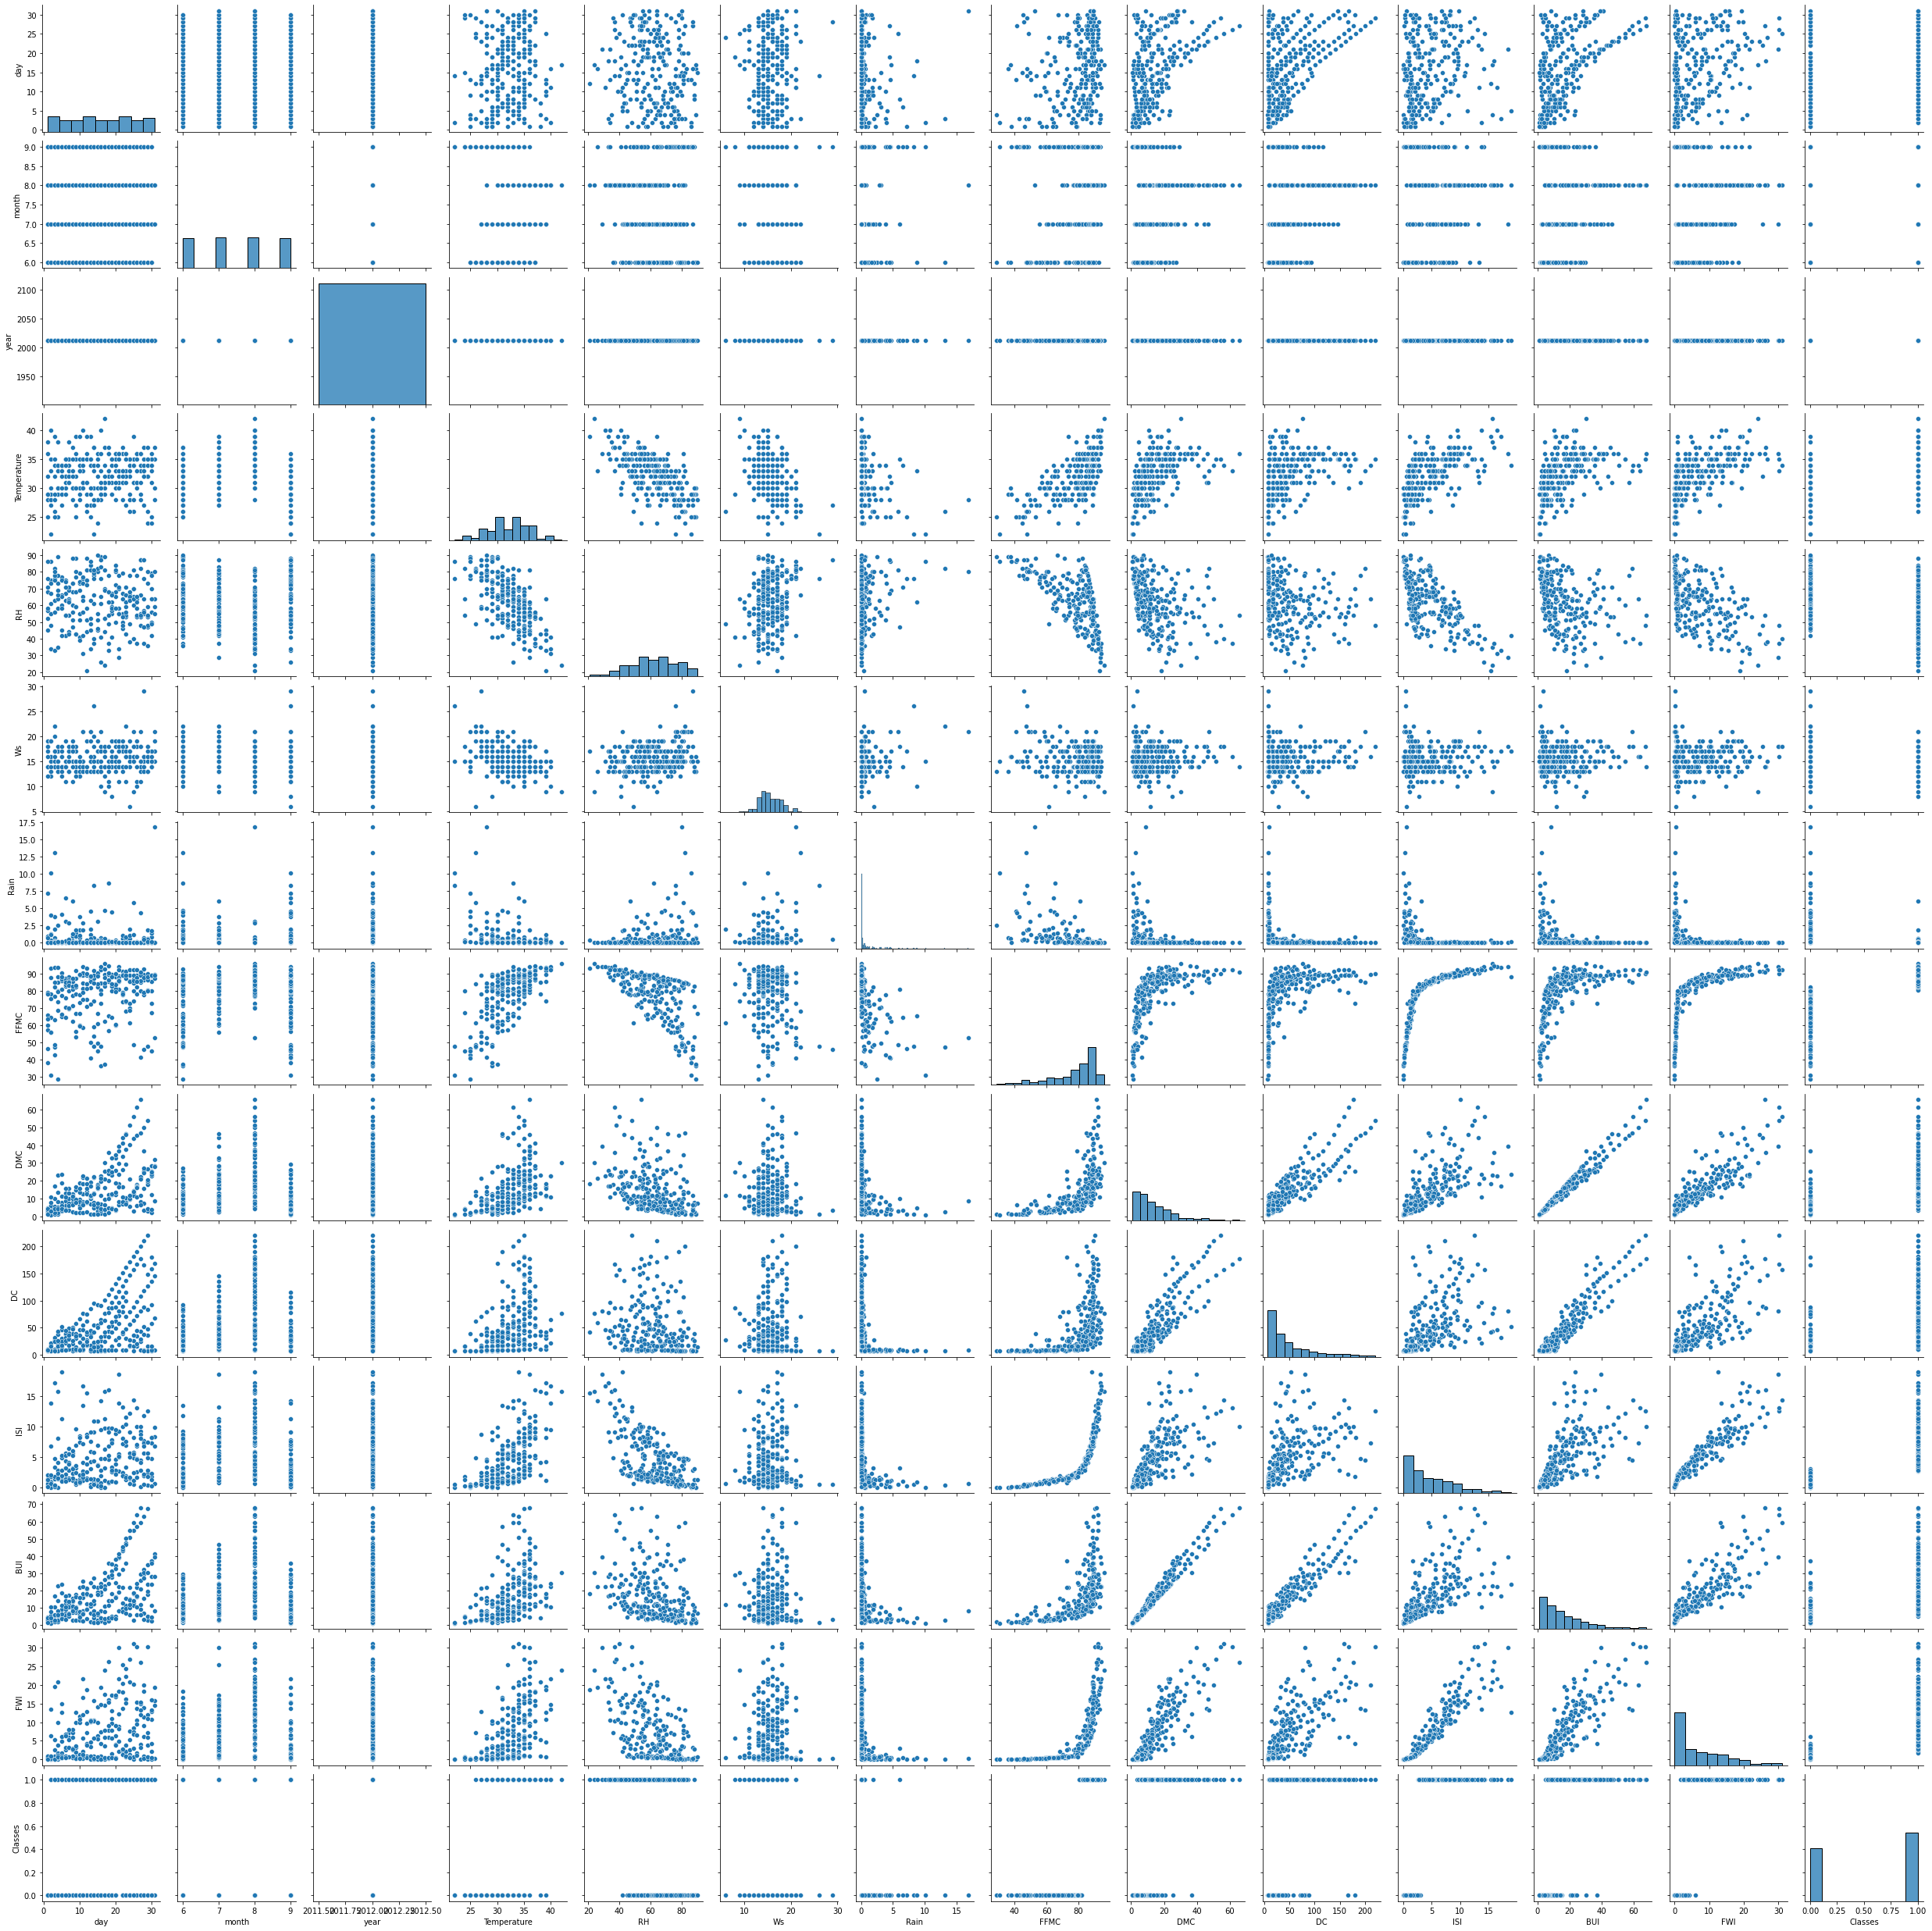

In [31]:
sns.pairplot(df)

# Month wise Analysis

In [32]:
#1. Grouping by on the basis of month
month=df.groupby('month')
month

In [33]:
#1. As we can see here in every month fire happend and that happend always in every month's last day and tempreture of every 
#2. Month is also more than 35 tempreture every month
month.max()

,day,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
month,,,,,,,,,,,,,
6,30,2012,37.0,90.0,22.0,13.1,92.5,27.2,92.8,13.4,29.7,18.4,1
7,31,2012,39.0,87.0,22.0,6.0,93.9,46.6,145.7,18.5,46.5,30.0,1
8,31,2012,42.0,82.0,21.0,16.8,96.0,65.9,220.4,19.0,68.0,31.1,1
9,30,2012,36.0,88.0,29.0,10.1,93.9,29.4,115.6,14.2,36.0,21.6,1


In [34]:
#1. Here we can see always in starting days of month fire didn't happened 
#2. whenever rain was not there fire didnt happened 
#3. In month of starting days tempreture was also bettween 20 to 30 every month
month.min()

,day,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
month,,,,,,,,,,,,,
6,1,2012,25.0,36.0,10.0,0.0,28.6,1.1,6.9,0.0,1.6,0.0,0
7,1,2012,27.0,29.0,9.0,0.0,55.7,2.4,8.3,0.7,2.8,0.3,0
8,1,2012,28.0,21.0,9.0,0.0,52.5,4.4,8.7,0.6,4.4,0.3,0
9,1,2012,22.0,26.0,6.0,0.0,30.5,0.7,7.0,0.0,1.1,0.0,0


# Day Wise Analysis

In [35]:
#1. Grouping by on the basis of Day
day=df.groupby('day')
day

In [36]:
#1. From here we can see that in 9th month everyday almost fire happened and tempreture was high
#2. only for day 1 fire never happened but tempreture was maximum
#3. And day 31st fire happened but it happened in 8th month
day.max()

,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
day,,,,,,,,,,,,,
1,9,2012,38.0,86.0,19.0,7.2,78.8,4.8,10.5,2.0,4.7,0.9,0
2,9,2012,40.0,86.0,19.0,10.1,93.3,10.8,21.4,13.8,10.6,13.5,1
3,9,2012,39.0,82.0,22.0,13.1,93.7,17.1,32.1,17.2,16.9,19.5,1
4,9,2012,38.0,89.0,18.0,2.5,93.8,23.0,42.7,15.7,22.9,20.9,1
5,9,2012,34.0,77.0,18.0,4.1,90.5,23.6,52.5,19.0,23.5,15.0,1
6,9,2012,35.0,75.0,19.0,6.5,87.0,15.5,45.1,5.6,16.7,6.8,1
7,9,2012,38.0,71.0,18.0,2.9,88.2,15.5,48.6,6.4,17.2,8.0,1
8,9,2012,37.0,88.0,19.0,6.0,87.4,12.5,49.8,6.0,15.4,8.0,1
9,9,2012,39.0,88.0,18.0,1.9,91.7,16.5,57.0,9.6,17.9,12.7,1


In [37]:
#1. everyday 6th month is having minimum fire except 31st
#2. on 31st 7th month is having minimum tempreture and no fire
day.min()

,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
day,,,,,,,,,,,,,
1,6,2012,25.0,45.0,12.0,0.0,37.9,0.9,7.5,0.1,1.4,0.0,0
2,6,2012,22.0,34.0,12.0,0.0,30.5,0.7,7.0,0.0,1.1,0.0,0
3,6,2012,25.0,33.0,14.0,0.0,42.6,1.2,7.1,0.1,1.7,0.0,0
4,6,2012,25.0,35.0,13.0,0.0,28.6,1.3,6.9,0.0,1.7,0.0,0
5,6,2012,27.0,42.0,12.0,0.0,64.8,3.0,8.4,1.0,3.9,0.4,0
6,6,2012,29.0,42.0,11.0,0.0,64.5,3.3,9.1,1.0,3.5,0.4,0
7,6,2012,31.0,43.0,13.0,0.0,69.6,3.2,9.8,1.2,5.1,0.6,0
8,6,2012,28.0,47.0,11.0,0.0,62.0,2.6,7.4,1.1,3.0,0.4,0
9,6,2012,25.0,43.0,12.0,0.0,52.9,2.1,8.4,0.4,2.6,0.2,0


# Tempreture wise analysis

In [38]:
tempreture=df.groupby('Temperature')
tempreture

In [39]:
#1. We can see whenever tempreture is having more than 25 mostly fire happened and rain also happened
#2. In 9th month maximum tempreture was 36 but in 8th month maximum tempreture was 42 so overall max tempreture was in 8th  month
#3. maximum tempreture happend in which day also we can see from here
tempreture.max()

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
Temperature,,,,,,,,,,,,,
22.0,14,9,2012,86.0,26.0,10.1,47.4,1.1,7.0,0.4,1.6,0.1,0
24.0,30,9,2012,82.0,18.0,0.4,79.7,4.3,16.5,1.7,5.1,0.7,0
25.0,30,9,2012,89.0,21.0,7.2,52.9,7.9,38.8,0.4,10.5,0.3,0
26.0,29,9,2012,82.0,22.0,13.1,84.0,13.8,61.4,4.8,17.7,7.1,1
27.0,28,9,2012,87.0,29.0,1.2,88.9,21.3,71.3,8.7,21.2,12.9,1
28.0,31,9,2012,90.0,21.0,16.8,84.6,16.4,79.9,4.5,21.7,6.3,1
29.0,27,9,2012,89.0,19.0,2.0,89.3,24.9,86.0,9.1,28.9,10.3,1
30.0,31,9,2012,89.0,21.0,4.1,89.4,27.8,168.2,9.8,39.3,19.4,1
31.0,30,9,2012,83.0,21.0,4.7,90.6,46.6,190.6,13.4,57.1,16.7,1


In [40]:
#1. In 6th month mostly min tempreture was there and fire also not happened in 6th monthly mostly
#2. In 6th month mostly rain also didn't happened
tempreture.min()

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
Temperature,,,,,,,,,,,,,
22.0,2,9,2012,76.0,15.0,8.3,30.5,0.7,7.0,0.0,1.1,0.0,0
24.0,15,9,2012,54.0,15.0,0.1,44.9,0.9,7.3,0.2,1.4,0.0,0
25.0,1,6,2012,76.0,13.0,0.2,28.6,1.2,6.9,0.0,1.7,0.0,0
26.0,3,6,2012,49.0,6.0,0.0,47.1,2.5,7.1,0.3,2.7,0.1,0
27.0,2,6,2012,58.0,16.0,0.0,45.9,2.4,7.3,0.4,2.8,0.2,0
28.0,1,6,2012,51.0,12.0,0.0,41.1,2.9,7.4,0.1,3.0,0.0,0
29.0,1,6,2012,41.0,8.0,0.0,36.1,0.9,7.6,0.0,1.4,0.0,0
30.0,2,6,2012,41.0,12.0,0.0,37.3,1.1,7.8,0.0,1.6,0.0,0
31.0,6,6,2012,42.0,11.0,0.0,56.9,1.9,8.0,0.7,2.4,0.2,0


In [41]:
#Maximum rain
df['Rain'].max()

16.8

In [42]:
#Minimum rain
df['Rain'].min()

0.0

<AxesSubplot:xlabel='day', ylabel='Temperature'>

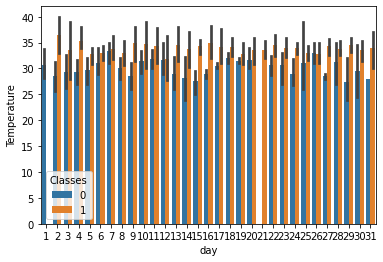

In [43]:
sns.barplot('day','Temperature',hue='Classes',data=df)

In [44]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    float64
 4   RH           244 non-null    float64
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 26.8 KB


In [46]:
df['Classes'].unique()

array([0, 1], dtype=int64)

# 5. Feature engineering

In [47]:
x=df.drop('Classes',axis=1)

In [48]:
x.head(2)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,2012,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,2012,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4


In [49]:
y=df['Classes']

In [50]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Classes, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [52]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# Linear Regression model buildng

In [53]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [55]:
lr.score(x_train, y_train),lr.score(x_test, y_test)

(0.9631901840490797, 0.9753086419753086)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred)

In [56]:
y_pred=lr.predict(x_test)

In [62]:
y_predict = lr.predict(x_test)
from sklearn.metrics import classification_report
report = classification_report(y_test,y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       1.00      0.96      0.98        53

    accuracy                           0.98        81
   macro avg       0.97      0.98      0.97        81
weighted avg       0.98      0.98      0.98        81



In [63]:
evaluate = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
evaluate.head(10)

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,0,0
6,1,1
7,0,0
8,0,0
9,0,0


<AxesSubplot:>

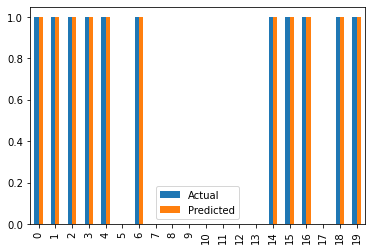

In [64]:
#Evaluating accuracy using bar plot
evaluate.head(20).plot(kind = 'bar')